In [189]:
from PIL import Image 
img_classification  = Image.open("image/classification.png")

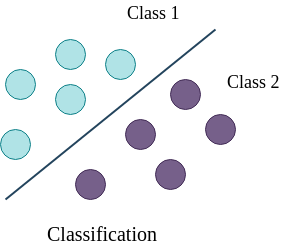

In [190]:
img_classification

In [201]:
"""
Classification of thyroid 
using scikit learn
"""

# More information about dataset: https://archive.ics.uci.edu/ml/datasets/Thyroid+Disease
# Link to dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/
# Description: https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allbp.names

import pandas as pd
import numpy as np
import warnings


warnings.filterwarnings("ignore")


def extract_data(path):
    data_frame = pd.read_csv(path, sep="\t")
    return data_frame

def create_features_target(data_frame):
    target = data_frame[["target"]]
    features = data_frame.drop("target", axis=1)
    return features, target

d_frame = extract_data("data/allbp_classification.tsv")
print(d_frame.shape)
data_features, data_target = create_features_target(d_frame)
data_features = data_features
print(data_features.shape)
print(data_target.shape)

(3772, 30)
(3772, 29)
(3772, 1)


In [202]:
d_frame

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,target
0,34,1,0,0,0,0,0,0,0,0,...,1,28,1,72,1,10,0,0,1,2
1,15,1,0,0,0,0,0,0,0,0,...,1,3,0,146,0,234,0,0,4,2
2,40,2,0,0,0,0,0,0,0,0,...,1,10,1,48,1,22,0,0,4,2
3,67,1,1,0,0,0,0,0,0,0,...,1,83,0,146,0,234,0,0,4,2
4,67,1,0,0,0,0,0,0,0,0,...,1,201,1,44,1,199,0,0,3,2
5,9,1,1,0,0,0,0,0,0,0,...,1,92,1,88,1,45,0,0,4,2
6,54,1,0,0,0,0,0,0,0,0,...,1,212,1,49,1,207,0,0,4,2
7,78,1,0,0,0,0,0,0,0,0,...,1,220,1,27,1,17,0,0,3,2
8,62,1,0,0,0,0,0,0,0,0,...,1,26,1,50,1,35,0,0,3,2
9,64,2,0,0,0,0,0,0,0,0,...,1,223,1,46,1,227,0,0,3,2


In [203]:
from sklearn.model_selection import train_test_split

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

# divide the entire dataset into training and test sets
# learn on training set and evaluate the trained model on test set
data_features_train, data_features_test, data_target_train, data_target_test = train_test_split(data_features, 
    data_target, test_size=0.33, random_state=42)

# shapes of the datasets
print("Training set")
print(data_features_train.shape)
print(data_target_train.shape)
print()
print("Test set")
print(data_features_test.shape)
print(data_target_test.shape)


Training set
(2527, 29)
(2527, 1)

Test set
(1245, 29)
(1245, 1)


In [204]:
from sklearn.linear_model import LogisticRegression
# Logistic regression: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

from sklearn.preprocessing import label_binarize
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html

# fit a linear model
trained_model = LogisticRegression().fit(data_features_train, data_target_train)
prediction = trained_model.predict(data_features_test)
proba_prediction = trained_model.decision_function(data_features_test)

# binarize the classes/labels
# class 0 = [1, 0, 0]
# class 1 = [0, 1, 0]
# class 2 = [0, 0, 1]
data_target_test_binary = label_binarize(data_target_test, classes=[0, 1, 2])
n_classes = data_target_test_binary.shape[1]

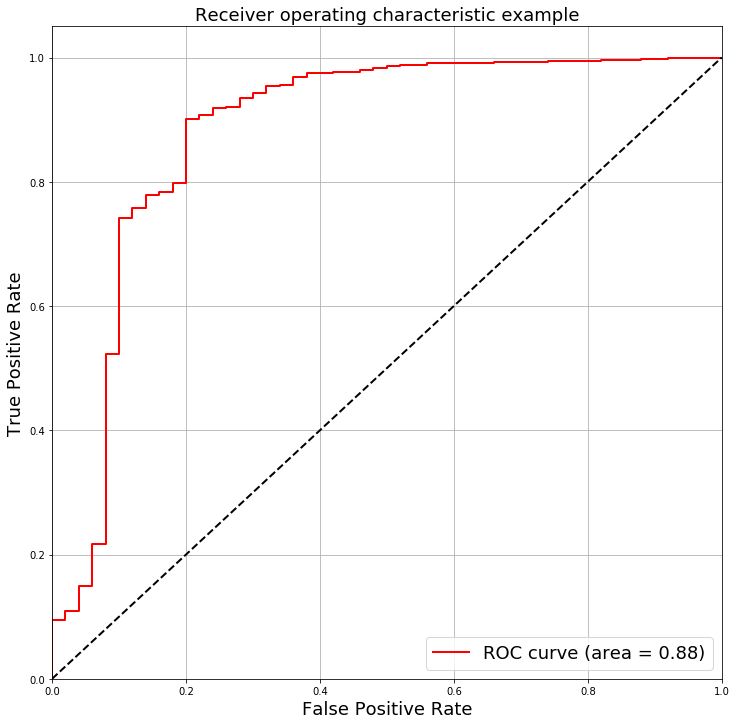

In [205]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

f_size = 18

# plot area under curve
def auc_plot(binarized_labels, probabilistic_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], probabilistic_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(binarized_labels.ravel(), probabilistic_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(12,12))
    lw = 2
    plt.plot(fpr[2], tpr[2], color='red', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=f_size)
    plt.ylabel('True Positive Rate', fontsize=f_size)
    plt.title('Receiver operating characteristic example', fontsize=f_size)
    plt.legend(loc="lower right", fontsize=f_size)
    plt.grid(True)
    plt.show()

In [ ]:
auc_plot(data_target_test_binary, proba_prediction)

In [194]:
# Hyperparameter optimisation

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
# https://github.com/hyperopt/hyperopt/wiki/FMin

from sklearn.neighbors import KNeighborsClassifier 
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier


# configuration evaluation
def knn_model(params):    
    model = KNeighborsClassifier(**params)
    trained_model = model.fit(data_features_train, data_target_train)
    prediction = trained_model.predict(data_features_test)
    l_data_target_test = data_target_test['target'].values.tolist()
    accuracy = len([x for x, y in zip(l_data_target_test, prediction) if x == y]) / float(len(prediction))
    return {'loss': -accuracy, 'status': STATUS_OK}

# max number of configuration evaluation
n_max_evaluation = 100

trials = Trials()

# configuration search space
search_space = {
    'n_neighbors': hp.choice('n_neighbors', range(1, 50))
}

# minimize the error/ maximize the accuracy
best_params = fmin(knn_model, search_space, algo=tpe.suggest, max_evals=n_max_evaluation, trials=trials)
print("Best params: %s" % best_params)


100%|██████████| 100/100 [00:03<00:00, 29.16it/s, best loss: -0.9654618473895582]
Best params: {'n_neighbors': 17}


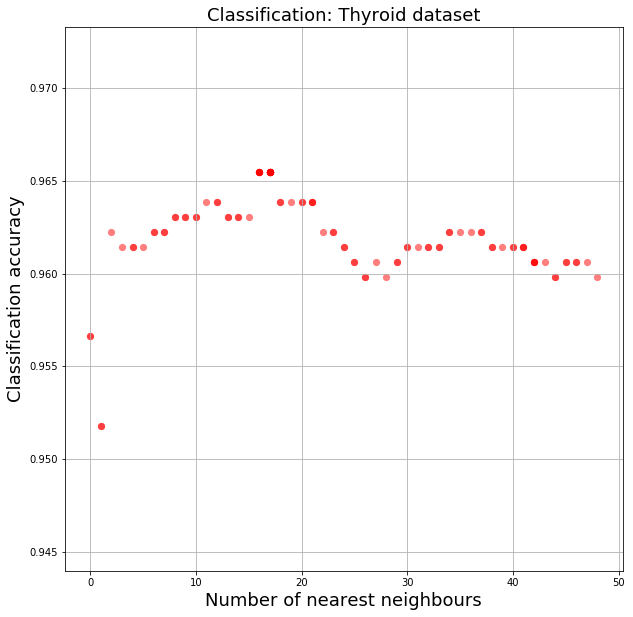

In [195]:
# Plot the optimization results
f_size = 18

def plot_classifiction_param(key, title, xlabel, ylabel):
    plt.figure(figsize=(10,10))
    xs = [t['misc']['vals'][key] for t in trials.trials]
    ys = [-t['result']['loss'] for t in trials.trials]
    plt.scatter(xs, ys, s=50, linewidth=0.1, alpha=0.5, color='red')
    plt.title('Classification: Thyroid dataset', fontsize=f_size)
    plt.xlabel(xlabel, fontsize=f_size)
    plt.ylabel('Classification accuracy', fontsize=f_size)
    plt.grid(True)
    plt.show()

In [ ]:
plot_classifiction_param('n_neighbors', 'Number of nearest neighbours')

In [196]:
# Running a classifier on default parameters

from sklearn.ensemble import RandomForestClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


model = RandomForestClassifier()
trained_model = model.fit(data_features_train, data_target_train)
prediction = trained_model.predict(data_features_test)
print("Feature weights:")
print(trained_model.feature_importances_)
prob_pred_rf = model.predict_proba(data_features_test)

Feature weights:
[0.11145229 0.01357842 0.01832996 0.00070765 0.00220627 0.00334181
 0.0361427  0.00147827 0.00996097 0.00487375 0.00665218 0.
 0.00268696 0.01331712 0.         0.0024603  0.00548876 0.07701073
 0.00637161 0.13510442 0.01633803 0.07462839 0.00678513 0.29635198
 0.00899383 0.1069736  0.         0.         0.03876488]


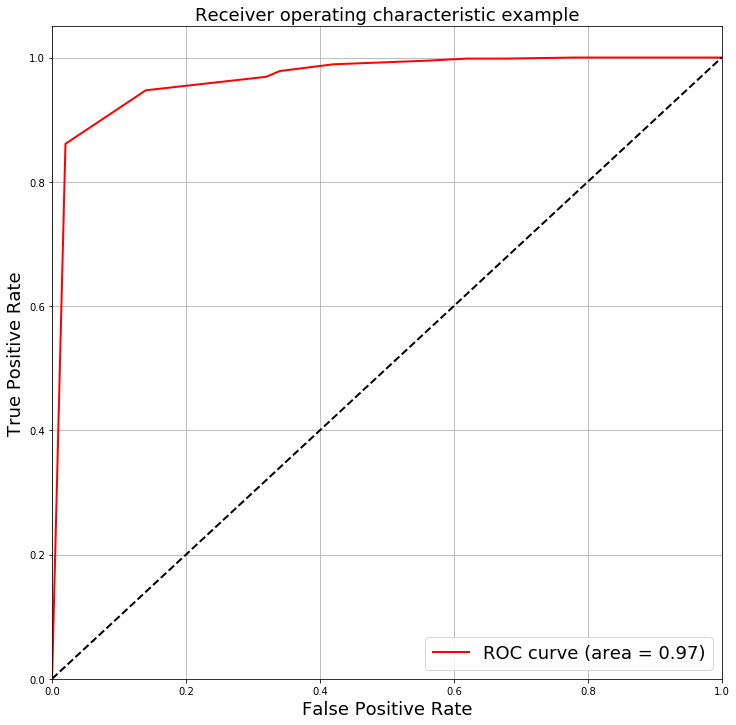

In [197]:
auc_plot(data_target_test_binary, prob_pred_rf)

In [198]:
# configuration evaluation

def rf_model(params):    
    model = RandomForestClassifier(**params)
    trained_model = model.fit(data_features_train, data_target_train)
    prediction = trained_model.predict(data_features_test)
    l_data_target_test = data_target_test['target'].values.tolist()
    accuracy = len([x for x, y in zip(l_data_target_test, prediction) if x == y]) / float(len(prediction))
    return {'loss': -accuracy, 'status': STATUS_OK}

# max number of configuration evaluation
n_max_evaluation = 200

# evaluation trials
trials = Trials()

# configuration search space
search_space = {
    'n_estimators': hp.choice('n_estimators', range(1,50)),
    'max_depth': hp.choice('max_depth', range(1,50))
}

# minimize the error/ maximize the accuracy
best_params = fmin(rf_model, search_space, algo=tpe.suggest, max_evals=n_max_evaluation, trials=trials)
print("Best params: %s" % best_params)

100%|██████████| 200/200 [00:13<00:00, 14.58it/s, best loss: -0.983132530120482] 
Best params: {'max_depth': 13, 'n_estimators': 26}


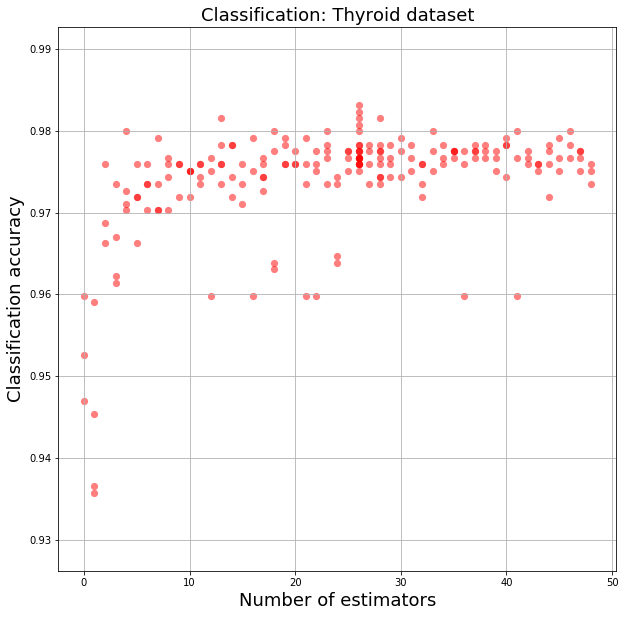

In [199]:
plot_classifiction_param('n_estimators', 'Number of estimators')

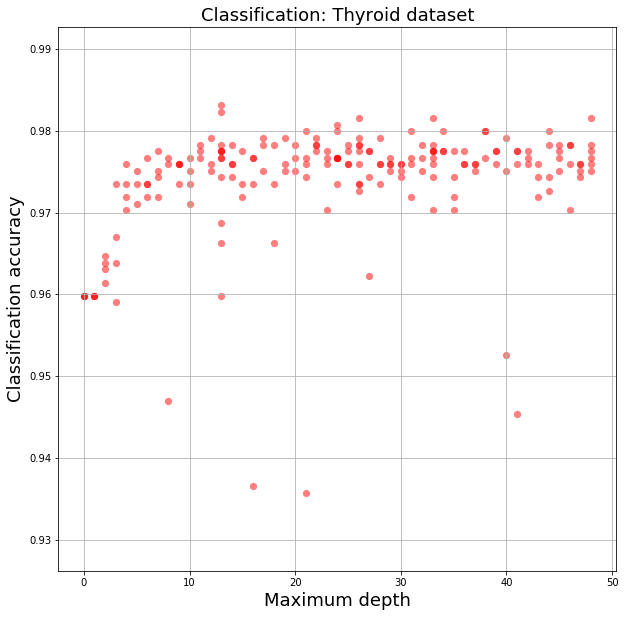

In [200]:
plot_classifiction_param('max_depth', 'Maximum depth')